In [ ]:
import pandas as pd
import numpy as nppandas
import matplotlib.pyplot as plt


# per capita columns :  'New_cases_p', 'New_deaths_p', 'Cumulative_cases_p' ,, 'total_vaccinations_p', 'people_vaccinated_p' , 'daily_vaccinations_p' 
df_vaccinations = pd.read_csv("./../Data/Final_Datasets/country_vaccinations_p.csv")
df_cases = pd.read_csv("./../Data/Final_Datasets/country_death_case_p.csv")

In [ ]:
isolist = {'ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARG', 'ARM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF',
       'CAN', 'CHE', 'CHL', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
       'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB',
       'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN',
       'IRL', 'ISL', 'ISR', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KHM', 'KNA', 'KWT', 'LBR', 'LBY', 'LCA', 'LSO', 'LTU', 'LUX',
       'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT',
       'MNE', 'MOZ', 'MRT', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER',
       'NGA', 'NIC', 'NLD', 'NOR', 'PAN', 'PER', 'PNG', 'POL', 'PRT',
       'PRY', 'ROU', 'RUS', 'RWA', 'SDN', 'SEN', 'SLE', 'SLV', 'SMR',
       'SOM', 'SRB', 'SSD', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SXM', 'SYC', 'TCA', 'TCD', 'TGO', 'TJK', 'TKM', 'TTO', 'TUN',
       'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VCT', 'VEN',
       'VGB', 'YEM', 'ZAF', 'ZMB', 'ZWE', 'ARE', 'BGD', 'BHR', 'BRN',
       'BTN', 'CHN', 'COK', 'FJI', 'GIB', 'GRL', 'HKG', 'IDN', 'IND',
       'IRN', 'IRQ', 'JOR', 'KIR', 'KOR', 'LAO', 'LBN', 'LIE', 'LKA',
       'MAC', 'MDV', 'MMR', 'MNG', 'NCL', 'NIU', 'NPL', 'NRU', 'NZL',
       'OMN', 'PAK', 'PHL', 'PSE', 'PYF', 'QAT', 'SAU', 'SGP', 'SHN',
       'SLB', 'SYR', 'THA', 'TKL', 'TLS', 'TON', 'TUV', 'TWN', 'VNM',
       'VUT', 'WLF', 'WSM'}

In [41]:
pd.options.mode.chained_assignment = None  # default='warn'
_filename = 0
def plot (col1, col2, dayssince, timeshift, _figsize=(12,10)): #timeshift, shift days_since_first_vac in vaccination df by x days
    fig = plt.figure(figsize=_figsize)
    plt.title(f"{col1} vs {col2} {dayssince} days since first vaccination")
 
    for i in isolist:    
        df_country_vax = df_vaccinations[df_vaccinations["iso_code"] == i]
        df_country_vax['days_since_first_vac'] = df_country_vax['days_since_first_vac'] + timeshift
        df_country_death = df_cases[(df_cases["iso_code"] == i) & (df_cases["days_since_first_vac"]==dayssince)]
        df_country = pd.merge(df_country_vax, df_country_death,  how="inner", on="days_since_first_vac")

        if(not(df_country[col1].empty or df_country[col2].empty)):
            plt.scatter(df_country[col1],df_country[col2], s=1)
            plt.text(df_country[col1].iloc[0], df_country[col2].iloc[0], i, fontsize=12)
            
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(col2, fontsize=12)
    plt.savefig(f'scatter{_filename}')
    plt.show()


_ylimit = 0.2
def plotlimitaxis (col1, col2, dayssince, timeshift, _figsize=(12,10)): #timeshift, shift days_since_first_vac in vaccination df by x days
    fig = plt.figure(figsize=_figsize)
    plt.title(f"{col1} vs {col2} {dayssince} days since first vaccination")

    ax = plt.gca()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, _ylimit])
    for i in isolist:    
        df_country_vax = df_vaccinations[df_vaccinations["iso_code"] == i]
        df_country_vax['days_since_first_vac'] = df_country_vax['days_since_first_vac'] + timeshift
        df_country_death = df_cases[(df_cases["iso_code"] == i) & (df_cases["days_since_first_vac"]==dayssince)]
        df_country = pd.merge(df_country_vax, df_country_death,  how="inner", on="days_since_first_vac")

        if(not(df_country[col1].empty or df_country[col2].empty) and df_country[col2].iloc[0]<= _ylimit):
            plt.scatter(df_country[col1],df_country[col2], s=1)
            plt.text(df_country[col1].iloc[0], df_country[col2].iloc[0], i, fontsize=12)
            
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(col2, fontsize=12)
    plt.savefig(f'scatter{_filename}')
    plt.show()

In [42]:
pd.options.mode.chained_assignment = None  # default='warn'
def plot_normalized (col1, col2, dayssince, timeshift, _figsize=(12,10)): #timeshift, shift days_since_first_vac in vaccination df by x days
    
    df_cases_min_max_scaled = df_cases.copy() 
    df_cases_min_max_scaled[[col2]] = (df_cases_min_max_scaled[[col2]] - df_cases_min_max_scaled[[col2]].min()) / (df_cases_min_max_scaled[[col2]].max() - df_cases_min_max_scaled[[col2]].min()) 
    df_vaccinations_min_max_scaled = df_vaccinations.copy() 
    df_vaccinations_min_max_scaled[[col1]] = (df_vaccinations_min_max_scaled[[col1]] - df_vaccinations_min_max_scaled[[col1]].min()) / (df_vaccinations_min_max_scaled[[col1]].max() - df_vaccinations_min_max_scaled[[col1]].min()) 

    fig = plt.figure(figsize=_figsize)
    
    for i in isolist:    
        df_country_vax = df_vaccinations_min_max_scaled[df_vaccinations_min_max_scaled["iso_code"] == i]
        df_country_vax['days_since_first_vac'] = df_country_vax['days_since_first_vac'] + timeshift  
        df_country_death = df_cases_min_max_scaled[(df_cases_min_max_scaled["iso_code"] == i) & (df_cases_min_max_scaled["days_since_first_vac"]==dayssince)]
        df_country = pd.merge(df_country_vax, df_country_death,  how="inner", on="days_since_first_vac")

        if(not(df_country[col1].empty or df_country[col2].empty)):
            plt.scatter(df_country[col1],df_country[col2], s=1)
            plt.text(df_country[col1].iloc[0], df_country[col2].iloc[0], i, fontsize=8)

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [43]:
# plot_normalized('daily_vaccinations_p' ,'New_cases_p',50.0,-14)
# plot('daily_vaccinations_p' ,'New_cases_p',250,-14)

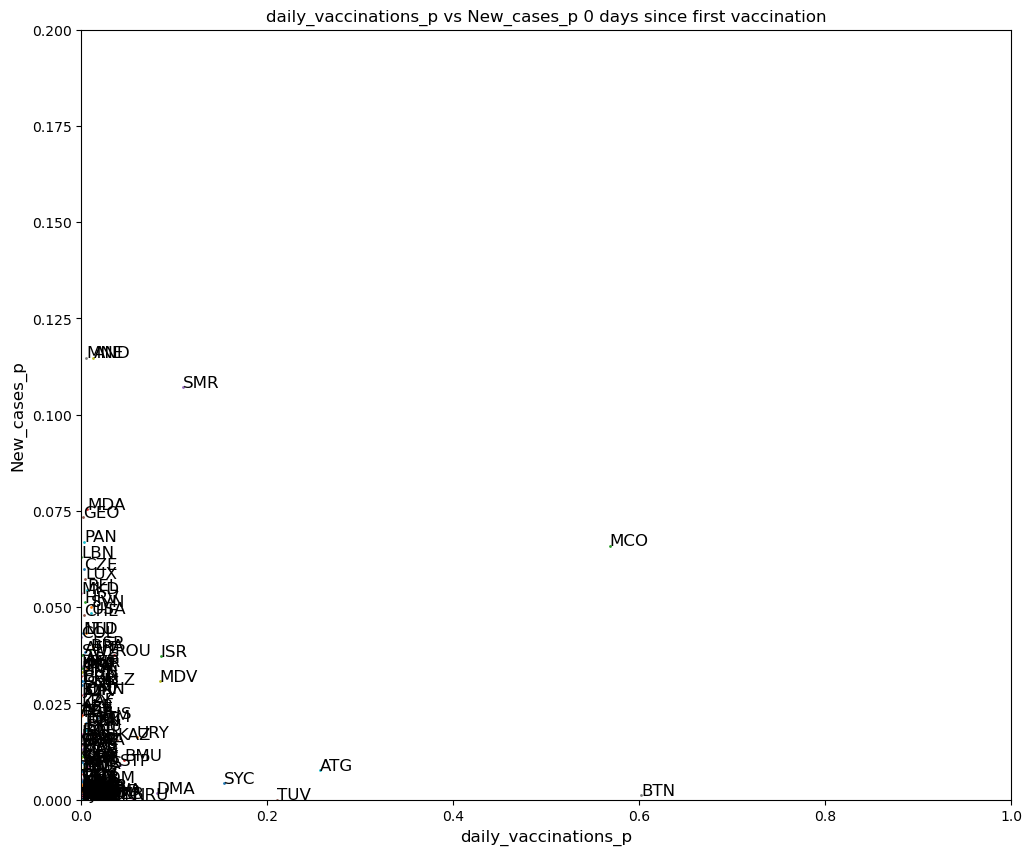

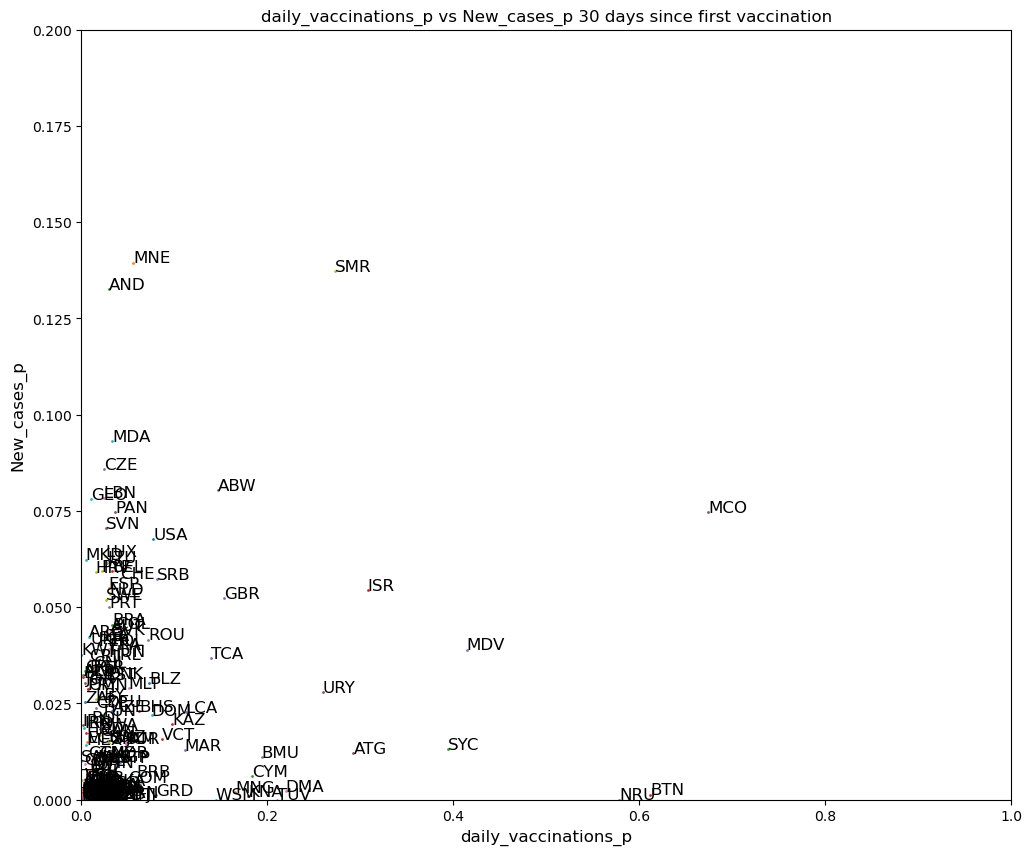

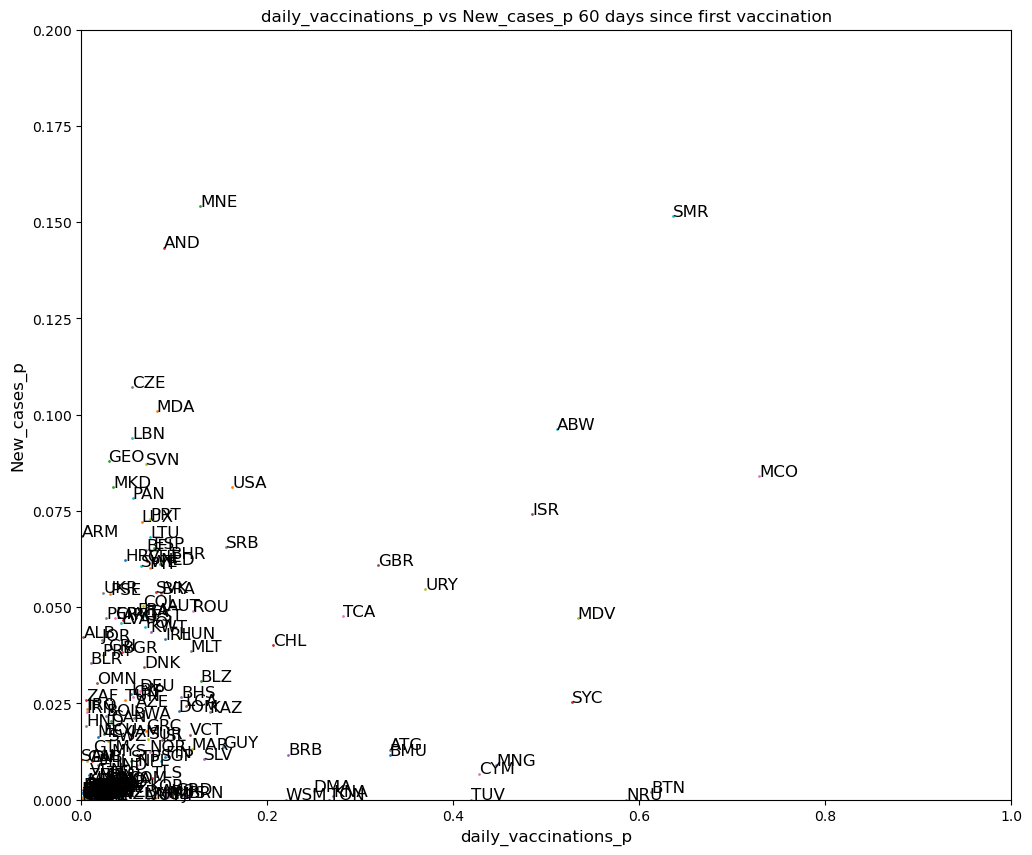

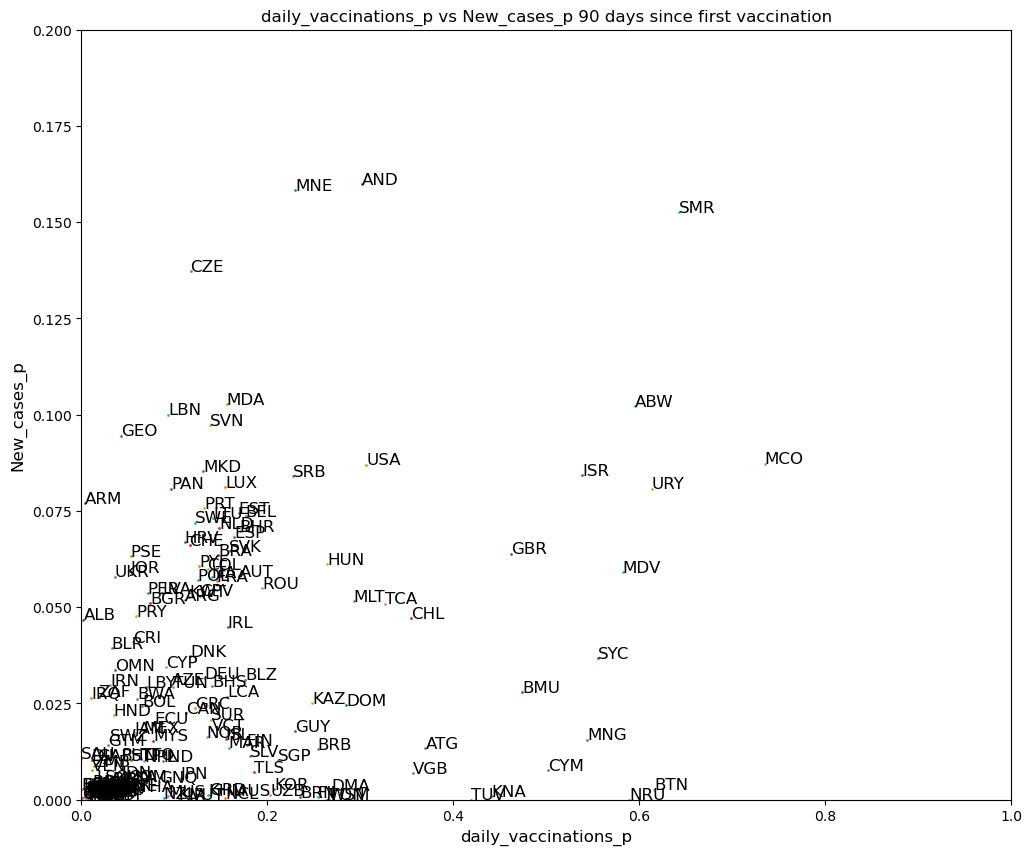

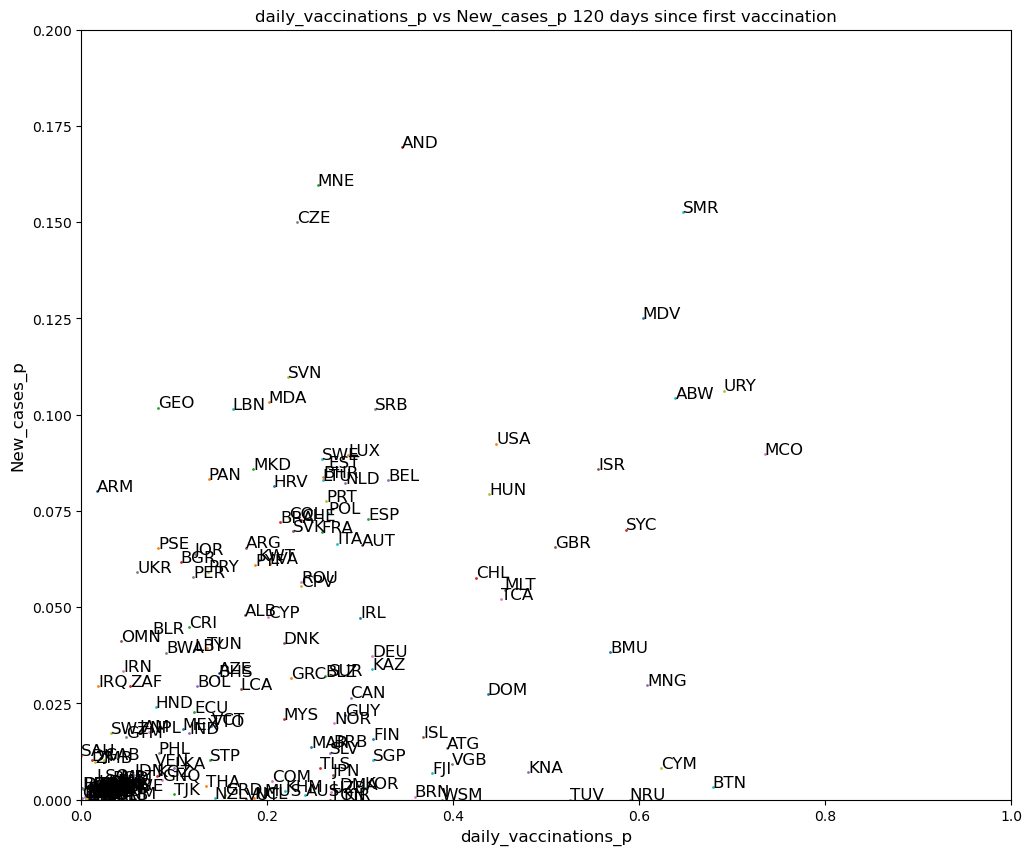

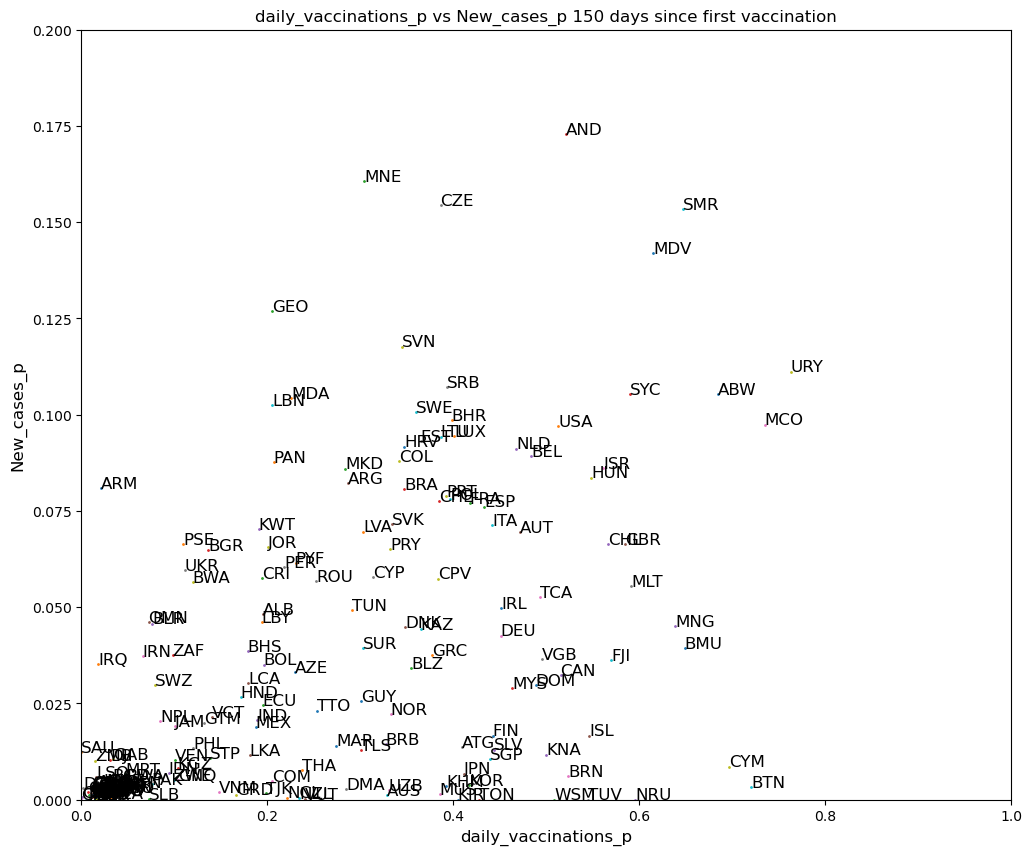

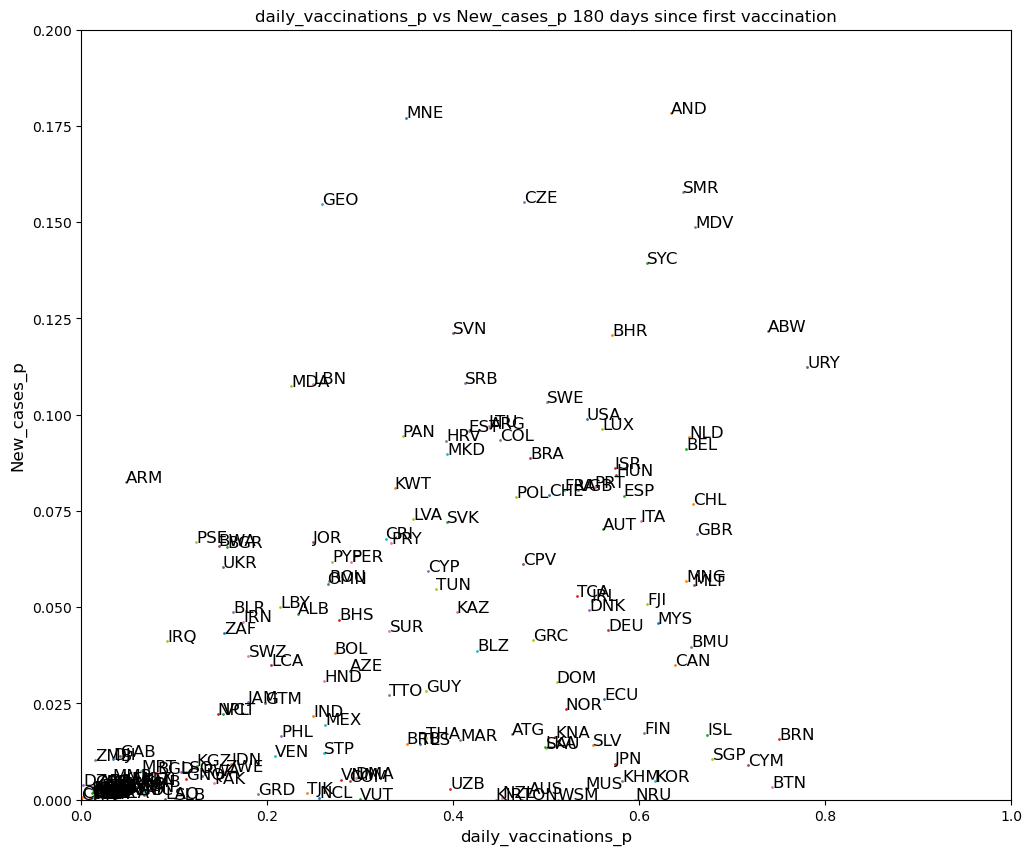

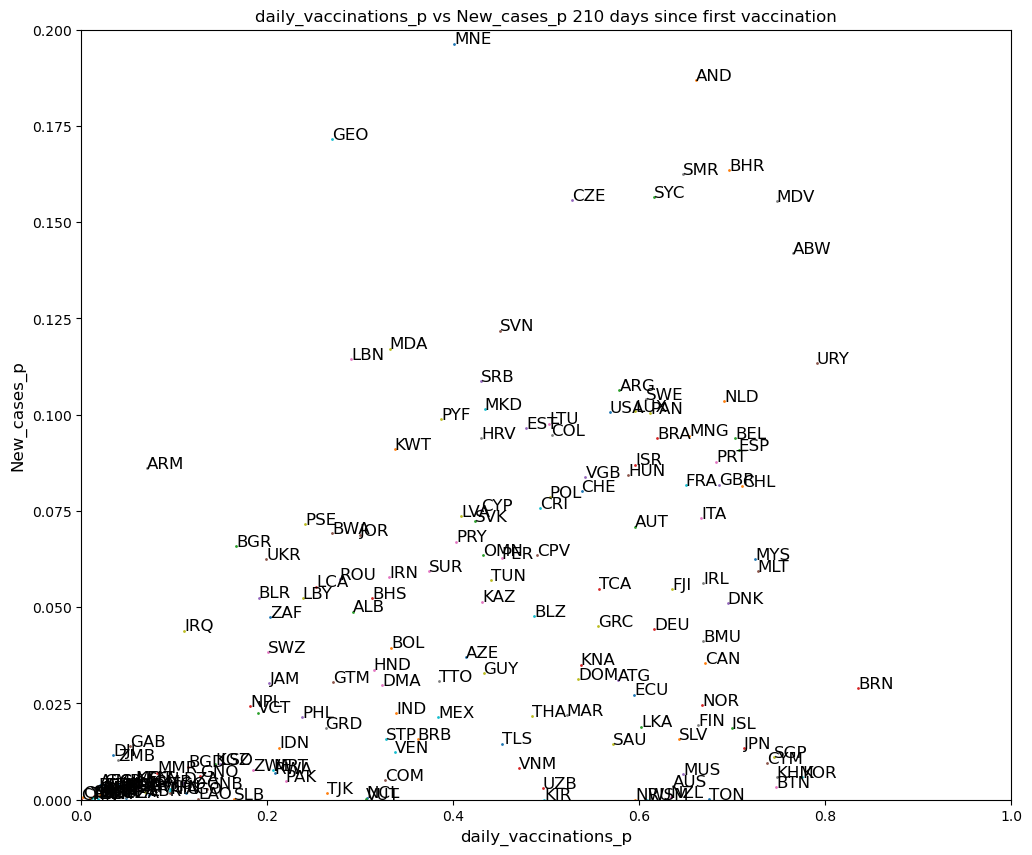

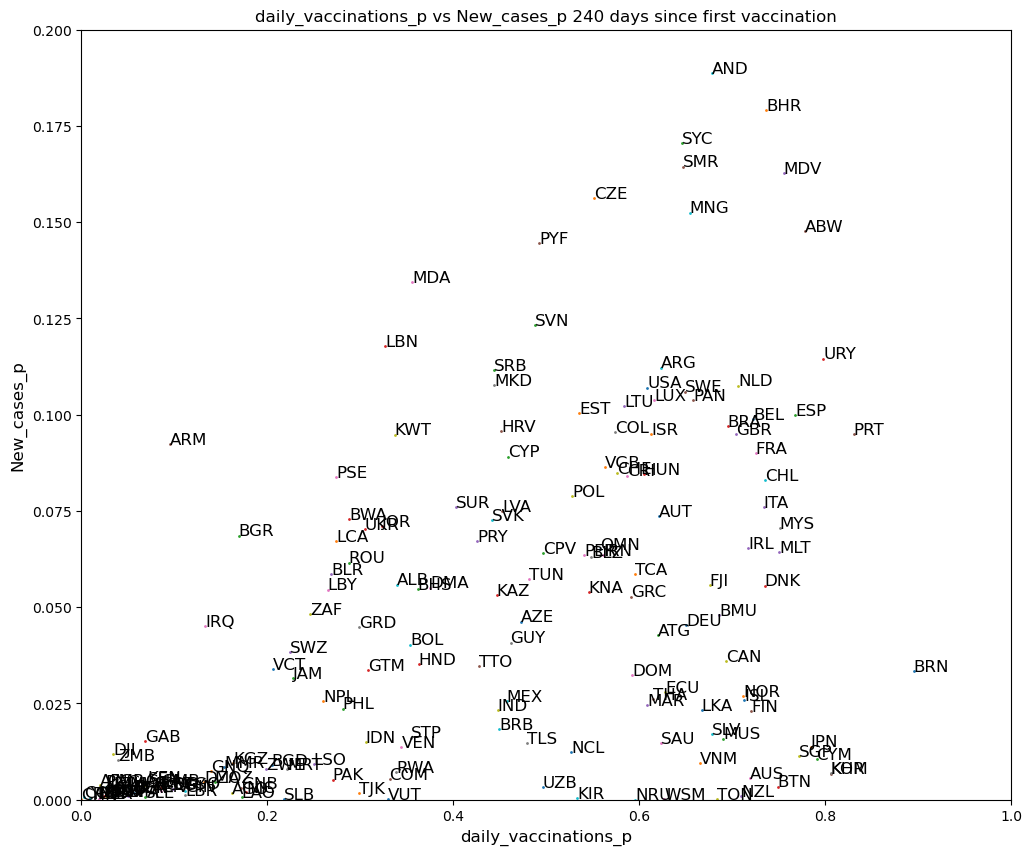

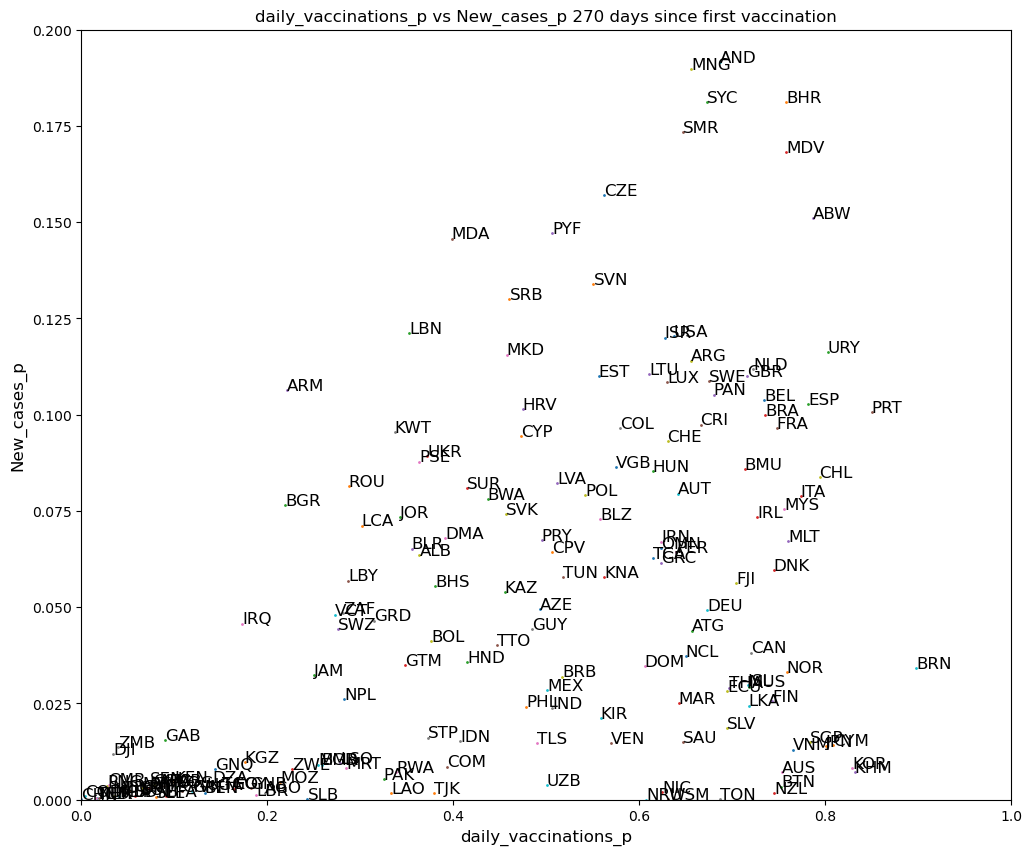

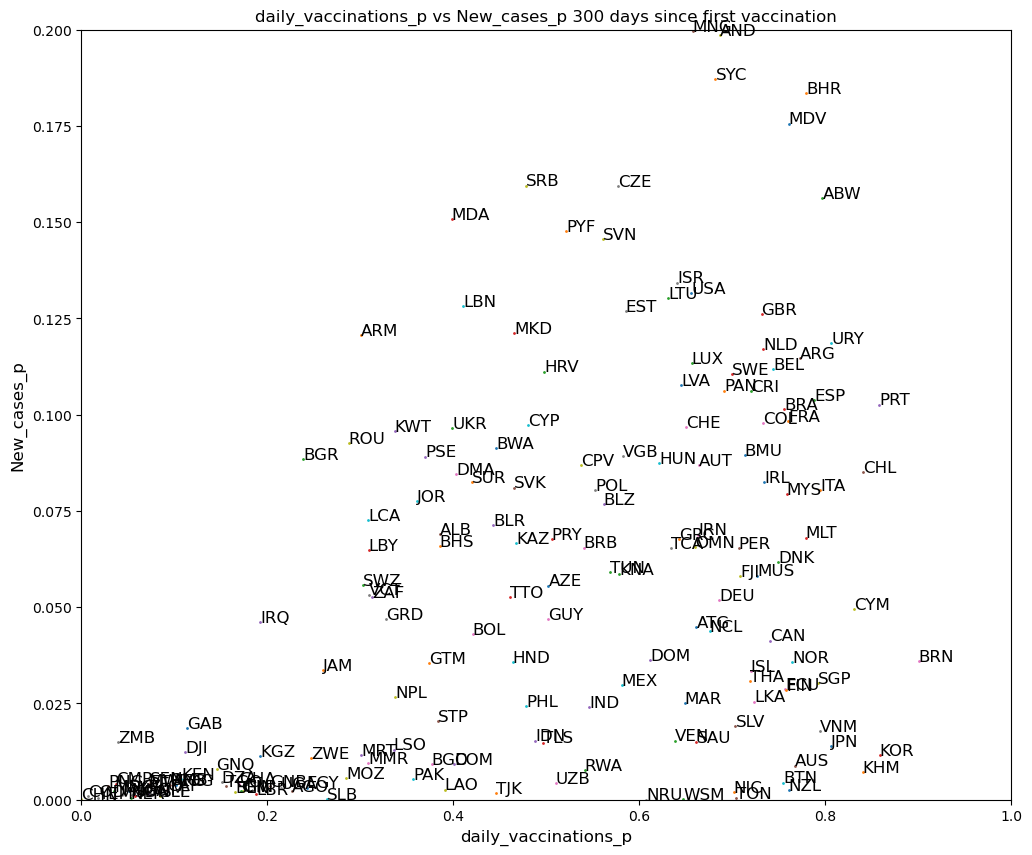

In [ ]:
_filename = 0
for i in range(0,450,30):
    _filename = i
    plotlimitaxis('daily_vaccinations_p' ,'New_cases_p',i,-14)
    

### Outlier Data

We see that the countries with codes `BRA` `IND` and `USA` are clear outliers. Let's compare them to the `GBR`, the next closest - but nowhere near as extreme - outlier

In [6]:
outliers = ['BRA','IND','USA', 'GBR']
col1, col2 = "daily_vaccinations", "New_cases"
dayssince, timeshift = 50, -14

for i in outliers:    
    df_country_vax = df_vaccinations[df_vaccinations["iso_code"] == i]
    df_country_vax['days_since_first_vac'] = df_country_vax['days_since_first_vac'] + timeshift
    df_country_death = df_cases[(df_cases["iso_code"] == i) & (df_cases["days_since_first_vac"]==dayssince)]
    df_country = pd.merge(df_country_vax, df_country_death,  how="inner", on="days_since_first_vac")

    if(not(df_country[col1].empty or df_country[col2].empty)):
        print("{}:\nDaily Vaccinations:\t{:10.0f}\nNew Cases:\t\t{:10.0f}\n".format(i, df_country[col1].iloc[0], df_country[col2].iloc[0]))

BRA:
Daily Vaccinations:	    400504
New Cases:		     69609

IND:
Daily Vaccinations:	   2165423
New Cases:		     18711

USA:
Daily Vaccinations:	   1737266
New Cases:		    111938

GBR:
Daily Vaccinations:	    344633
New Cases:		     11664



It's clear that `BRA` `IND` and `USA` are just orders of magnitude larger than `GBR`

(Where `BRA = Brazil`, `IND = India`, `USA = United States of America`, and `GBR = The United Kingdom of Great Britian and Northern Ireland`)

The reason these countries are such big outliers is because of their sheer size. The populations of each of these countries are `203,000,000`, `1,438,000,000`, `334,000,000`, and `68,000,000`. Raw numbers will of course be larger for countries with more people in it. 

Looking at their data per capita it's much more comparable:

In [7]:
col1, col2 = "daily_vaccinations_p", "New_cases_p"

df_cases_min_max_scaled = df_cases.copy() 
df_cases_min_max_scaled[[col2]] = (df_cases_min_max_scaled[[col2]] - df_cases_min_max_scaled[[col2]].min()) / (df_cases_min_max_scaled[[col2]].max() - df_cases_min_max_scaled[[col2]].min()) 
df_vaccinations_min_max_scaled = df_vaccinations.copy() 
df_vaccinations_min_max_scaled[[col1]] = (df_vaccinations_min_max_scaled[[col1]] - df_vaccinations_min_max_scaled[[col1]].min()) / (df_vaccinations_min_max_scaled[[col1]].max() - df_vaccinations_min_max_scaled[[col1]].min()) 
    
for i in outliers:    
    df_country_vax = df_vaccinations_min_max_scaled[df_vaccinations_min_max_scaled["iso_code"] == i]
    df_country_vax['days_since_first_vac'] = df_country_vax['days_since_first_vac'] + timeshift  
    df_country_death = df_cases_min_max_scaled[(df_cases_min_max_scaled["iso_code"] == i) & (df_cases_min_max_scaled["days_since_first_vac"]==dayssince)]
    df_country = pd.merge(df_country_vax, df_country_death,  how="inner", on="days_since_first_vac")
    
    if(not(df_country[col1].empty or df_country[col2].empty)):
        print("{}:\nDaily Vaccinations:\t{:1.9f}\nNew Cases:\t\t{:1.9f}\n".format(i, df_country[col1].iloc[0], df_country[col2].iloc[0]))

BRA:
Daily Vaccinations:	0.044250109
New Cases:		0.065586190

IND:
Daily Vaccinations:	0.020453117
New Cases:		0.010182657

USA:
Daily Vaccinations:	0.104320443
New Cases:		0.101176372

GBR:
Daily Vaccinations:	0.207559371
New Cases:		0.076615061



With this data can see that in raw numbers India had $125\%$ the number of daily vaccinations compared to USA while having only $16\%$ of the United States' new cases.

When comparing the data adjusted for each country's population, we find that Inda had only $20\%$ of the United States' daily vaccinations and $10\%$ of the United States' new cases.

Clearly using per-capita data greatly changes the outliers of our data. Looking at the outliers on the per-capita chart, we find 

In [8]:
outliers = ['MNE','AND','SMR','MCO']
col1, col2 = "daily_vaccinations_p", "New_cases_p"
dayssince, timeshift = 50, -14

df_cases_min_max_scaled = df_cases.copy() 
df_cases_min_max_scaled[[col2]] = (df_cases_min_max_scaled[[col2]] - df_cases_min_max_scaled[[col2]].min()) / (df_cases_min_max_scaled[[col2]].max() - df_cases_min_max_scaled[[col2]].min()) 
df_vaccinations_min_max_scaled = df_vaccinations.copy() 
df_vaccinations_min_max_scaled[[col1]] = (df_vaccinations_min_max_scaled[[col1]] - df_vaccinations_min_max_scaled[[col1]].min()) / (df_vaccinations_min_max_scaled[[col1]].max() - df_vaccinations_min_max_scaled[[col1]].min()) 
    
for i in outliers:    
    df_country_vax = df_vaccinations_min_max_scaled[df_vaccinations_min_max_scaled["iso_code"] == i]
    df_country_vax['days_since_first_vac'] = df_country_vax['days_since_first_vac'] + timeshift  
    df_country_death = df_cases_min_max_scaled[(df_cases_min_max_scaled["iso_code"] == i) & (df_cases_min_max_scaled["days_since_first_vac"]==dayssince)]
    df_country = pd.merge(df_country_vax, df_country_death,  how="inner", on="days_since_first_vac")
    
    if(not(df_country[col1].empty or df_country[col2].empty)):
        print("{}:\nDaily Vaccinations:\t{:1.9f}\nNew Cases:\t\t{:1.9f}\n".format(i, df_country[col1].iloc[0], df_country[col2].iloc[0]))

MNE:
Daily Vaccinations:	0.050598759
New Cases:		0.195162339

AND:
Daily Vaccinations:	0.068921731
New Cases:		0.180331380

SMR:
Daily Vaccinations:	0.468530800
New Cases:		0.194861089

MCO:
Daily Vaccinations:	0.559937305
New Cases:		0.106140971



We find that the key outliers in our code are now `MNE`, `AND`, `SMR`, and `MCO`

(Where `MNE = Montenegro`, `AND = Andorra`, `SMR = San Marino`, and `MCO = Monaco`)

All of these countries being outliers in our per-capita data makes sense, as each of these countries have extremely low population counts. The rough population of each of these countries are `620,000`, `85,000`, `35,000`, and `38,000` respectively. 

While per-capita data does help account for the larger countries having more people, it makes smaller countries' data stand out more.